Import libraries and data

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Create path
path= r'C:\Users\jerem\anaconda\Happiness Project\Data'

In [6]:
# Import data
happi= pd.read_pickle(os.path.join(path, 'happi.pkl'))

data cleaned in previous exercises

In [7]:
happi.describe()

Happiness Rank  Happiness Score  Economy GDPP  Family Social  \
count      782.000000       782.000000    782.000000     782.000000   
mean        78.698210         5.379018      0.916047       1.078392   
std         45.182384         1.127456      0.407340       0.329548   
min          1.000000         2.693000      0.000000       0.000000   
25%         40.000000         4.509750      0.606500       0.869363   
50%         79.000000         5.322000      0.982205       1.124735   
75%        118.000000         6.189500      1.236187       1.327250   
max        158.000000         7.769000      2.096000       1.644000   

       Life Expectancy     Freedom       Trust  Generosity         Year  
count       782.000000  782.000000  782.000000  782.000000   782.000000  
mean          0.612416    0.411091    0.125418    0.218576  2016.993606  
std           0.248309    0.152880    0.105750    0.122321     1.417364  
min           0.000000    0.000000    0.000000    0.000000  2015.000000  
25%           0.440183    0.309768    0.054250    0.130000  2016.000000  
50%           0.647310    0.431000    0.091033    0.201982  2017.000000  
75%           0.808000    0.531000    0.155861    0.278832  2018.000000  
max           1.141000    0.724000    0.551910    0.838075  2019.000000

In [8]:
happi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          782 non-null    object 
 1   Happiness Rank   782 non-null    int64  
 2   Happiness Score  782 non-null    float64
 3   Economy GDPP     782 non-null    float64
 4   Family Social    782 non-null    float64
 5   Life Expectancy  782 non-null    float64
 6   Freedom          782 non-null    float64
 7   Trust            782 non-null    float64
 8   Generosity       782 non-null    float64
 9   Year             782 non-null    int64  
 10  GDPP category    782 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 67.3+ KB


In [9]:
# Explore relationship with scatterplot
happy = happi[['Happiness Rank', 'Happiness Score', 'Economy GDPP', 'Life Expectancy', 'Freedom', 'Trust', 'Generosity']]

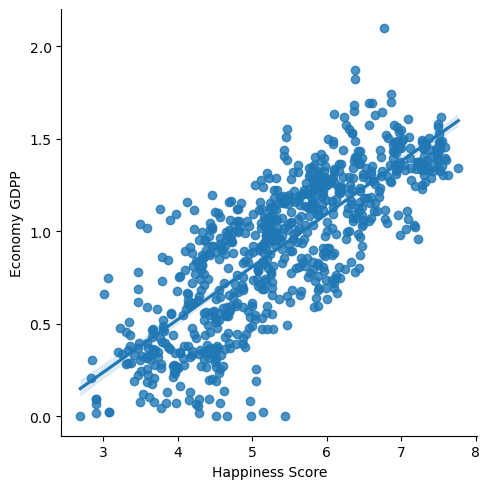

In [10]:
scatter=sns.lmplot(x = 'Happiness Score', y = 'Economy GDPP', data = happy)

If the Economic GDP per capita increases, then there will be a higher and increased happiness score.

In [11]:
# Re-shape variables into numpy arrays
x= happy['Economy GDPP'].values.reshape(-1,1)
y= happy['Happiness Score'].values.reshape(-1,1)

In [12]:
# Split data into train and test
x_train,x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=0)

In [13]:
# Perform linear regression
regression= LinearRegression()

In [14]:
# Fit regression to train set
regression.fit(x_train, y_train)

LinearRegression()

In [15]:
# Create prediction of y
y_predicted= regression.predict(x_test)

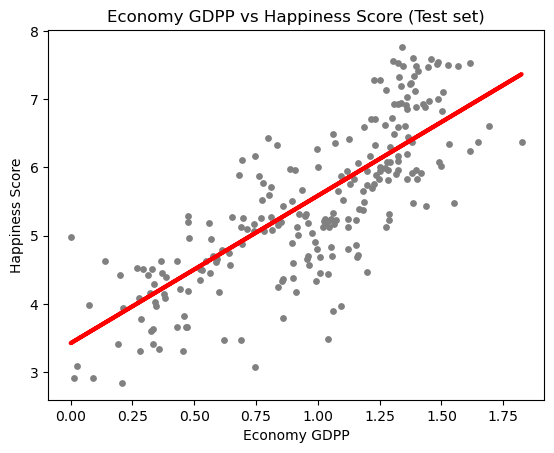

In [16]:
# Create plot to show model fit
plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('Economy GDPP vs Happiness Score (Test set)')
plot_test.xlabel('Economy GDPP')
plot_test.ylabel('Happiness Score')
plot_test.show()

I think the model fits fairly well. There is still quite a bit of variance, which I think would be explained by the other factors, such as life expectancy.

In [17]:
# Check performance stats
rmse = mean_squared_error(y_test, y_predicted)

In [18]:
r2 = r2_score(y_test, y_predicted)

In [19]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)                                                                                                                                      

Slope: [[2.16337475]]
Mean squared error:  0.503950724913581
R2 score:  0.6165274246795835


In [20]:
data= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0    5.525   5.806091
1    6.886   6.446876
2    6.344   6.733791
3    7.119   6.439326
4    3.781   4.039473
5    4.692   5.925228
6    4.390   4.255378
7    5.061   5.024176
8    6.929   6.506131
9    5.488   5.989301
10   6.485   5.719247
11   5.389   5.942637
12   3.334   4.199130
13   5.125   5.399803
14   2.905   3.455578
15   5.835   6.363543
16   4.190   4.452635
17   4.376   5.370807
18   4.800   5.847492
19   5.430   5.278003
20   6.375   7.369058
21   3.975   3.580405
22   4.700   4.664255
23   6.199   6.368995
24   6.611   7.079490
25   7.228   6.390628
26   5.762   6.081266
27   7.600   6.414426
28   3.657   4.355078
29   6.923   6.356014

After comparing predicted vs actual, it seems the fit is not as good as I had thought. The RMSE is ~.504, and R2 is ~.617. This tells me that there are other factors affecting the Happiness Score, not just the Economy. There weren't any extreme outliers in the data, so I would think that the variance is due to life expectancy, family support, trust, generosity, etc.

In [21]:
# Export
plot_test.figure.savefig(os.path.join(path, 'plottest'))

AttributeError: 'function' object has no attribute 'savefig'